In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


DATA UNDERSTANDING

In [4]:
df.shape


(918, 12)

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


DATA CLEANING

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

OUTLIER DETECTION

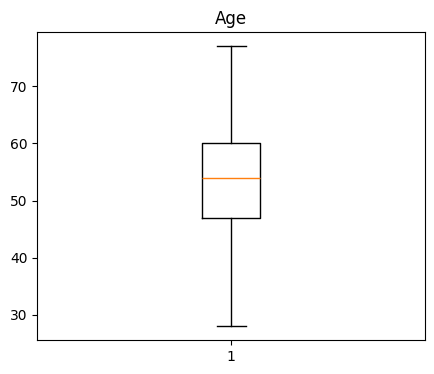

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.boxplot(df['Age'])
plt.title('Age')
plt.show()

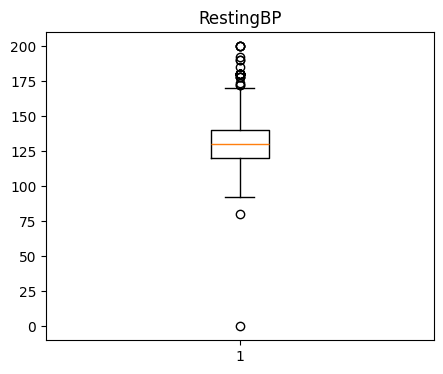

In [14]:
plt.figure(figsize=(5,4))
plt.boxplot(df['RestingBP'])
plt.title('RestingBP')
plt.show()

In [15]:
q1=df['RestingBP'].quantile(0.25)
q1

np.float64(120.0)

In [16]:
q3=df['RestingBP'].quantile(0.75)
q3

np.float64(140.0)

In [17]:
iqr=q3-q1
min_range=q1-1.5*iqr
print(min_range)
max_range=q3+1.5*iqr
print(max_range)

90.0
170.0


In [18]:
df=df[(df['RestingBP'] <= max_range) & (df['RestingBP'] >= min_range)]

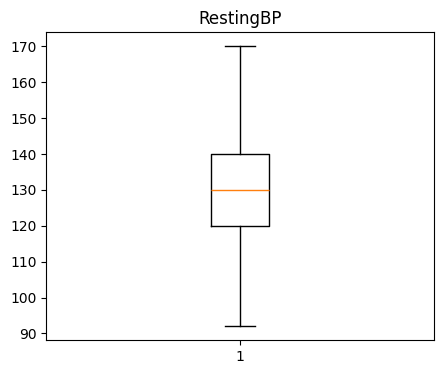

In [19]:
plt.figure(figsize=(5,4))
plt.boxplot(df['RestingBP'])
plt.title('RestingBP')
plt.show()

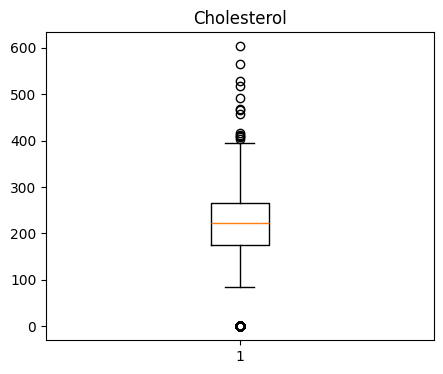

In [20]:
plt.figure(figsize=(5,4))
plt.boxplot(df['Cholesterol'])
plt.title('Cholesterol')
plt.show()

In [27]:
q1=df['Cholesterol'].quantile(0.25)
q1

np.float64(206.0)

In [28]:
q3=df['Cholesterol'].quantile(0.75)
q3

np.float64(272.0)

In [29]:
iqr=q3-q1
min_range=q1-1.5*iqr
print(min_range)
max_range=q3+1.5*iqr
print(max_range)

107.0
371.0


In [30]:
df=df[(df['Cholesterol'] <= max_range) & (df['Cholesterol'] >= min_range)]

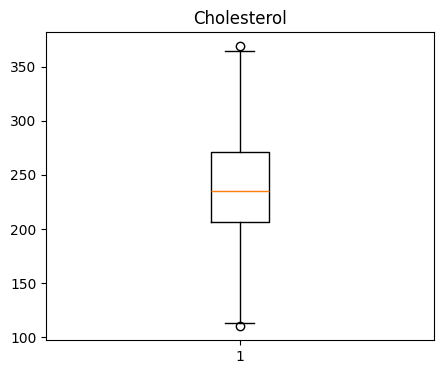

In [31]:
plt.figure(figsize=(5,4))
plt.boxplot(df['Cholesterol'])
plt.title('Cholesterol')
plt.show()

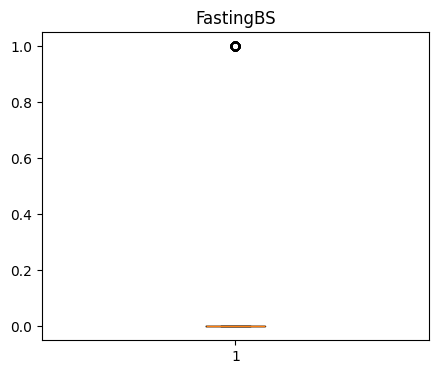

In [32]:
plt.figure(figsize=(5,4))
plt.boxplot(df['FastingBS'])
plt.title('FastingBS')
plt.show()

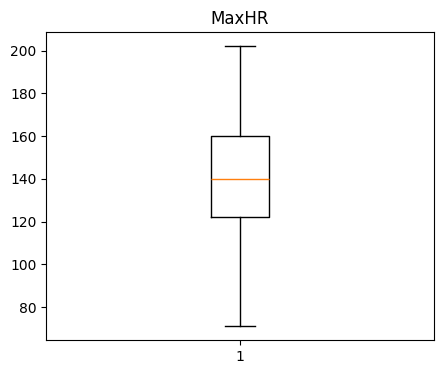

In [33]:
plt.figure(figsize=(5,4))
plt.boxplot(df['MaxHR'])
plt.title('MaxHR')
plt.show()

HEAT MAP

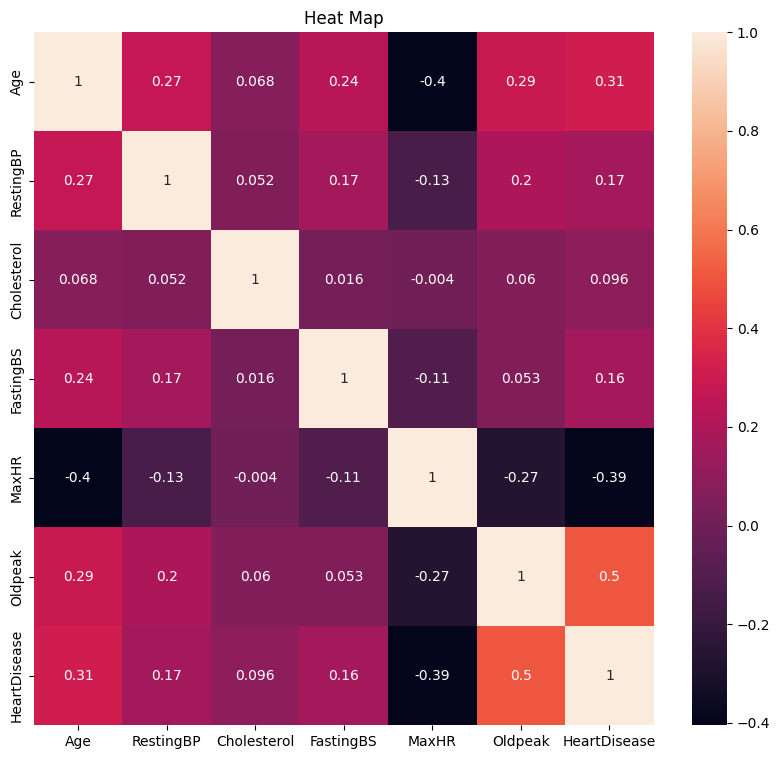

In [34]:
plt.figure(figsize=(10,9))
var1=df.corr(numeric_only=True)
sns.heatmap(var1,annot=True)
plt.title('Heat Map')
plt.show()

CATEGORICAL VALUE ENCODING

In [35]:
obj1=[]
for i in df:
    if df[i].dtype=='object':
        obj1.append(i)
obj1

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

ORDINAL ENCODING

In [37]:
from sklearn.preprocessing import OrdinalEncoder
obj=OrdinalEncoder(categories=[['Normal','ST','LVH']])
df['RestingECG']=obj.fit_transform(df[['RestingECG']])

In [38]:
obj=OrdinalEncoder(categories=[['Up','Flat','Down']])
df['ST_Slope']=obj.fit_transform(df[['ST_Slope']])

LABEL ENCODING

In [40]:
label_Enc=[]
Onehot_Enc=[]
for i in df:
    if df[i].dtype=='object' and df[i].nunique()>2:
        Onehot_Enc.append(i)
    elif df[i].dtype=='object' and df[i].nunique()<=2:
        label_Enc.append(i)

In [41]:
label_Enc

['Sex', 'ExerciseAngina']

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [43]:
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])

ONE HOT ENCODING

In [44]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder(sparse_output=False,drop='first')
result=onehot.fit_transform(df[Onehot_Enc])

In [45]:
result=pd.DataFrame(result,columns=onehot.get_feature_names_out())
result

,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
699,0.0,0.0,1.0
700,0.0,0.0,0.0
701,0.0,0.0,0.0
702,1.0,0.0,0.0


In [46]:
df=df.drop(columns=Onehot_Enc)

In [47]:
df.reset_index(drop=True, inplace=True)

In [48]:
df=df.join(result)

In [49]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

SAMPLING

In [51]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_resample,y_resample=sampler.fit_resample(x,y)
y_resample.value_counts()

c:\Users\yaswa\Projects\MachineLearning\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\yaswa\Projects\MachineLearning\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


HeartDisease
0    372
1    372
Name: count, dtype: int64

SCALING

In [52]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x_resample)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_resample,test_size=0.2,random_state=50)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_test,y_test)

KNeighborsClassifier()

In [55]:
y_pred=knn_model.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))

0.8926174496644296


In [58]:
models=[KNeighborsClassifier()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
print(f"Accuracy :{accuracy_score(y_test,y_pred)}")
print("-----------------------------")
print(f"Confusion_matrix:\n {confusion_matrix(y_test,y_pred)}")
print()
print(f"classification_report:\n{classification_report(y_test,y_pred)}")

Accuracy :0.8791946308724832
-----------------------------
Confusion_matrix:
 [[58 11]
 [ 7 73]]

classification_report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        69
           1       0.87      0.91      0.89        80

    accuracy                           0.88       149
   macro avg       0.88      0.88      0.88       149
weighted avg       0.88      0.88      0.88       149

